In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data 

In [2]:
data=pd.read_excel(r'C:\Users\user\Documents\MEHBOOBA\ONLINE COURSES\1. ICT\SECTION 15\Casestudy\WEB\iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Understanding Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

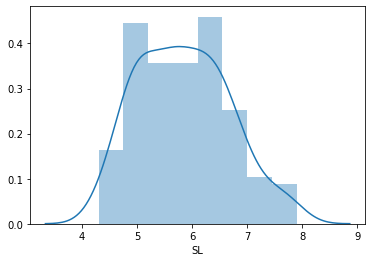

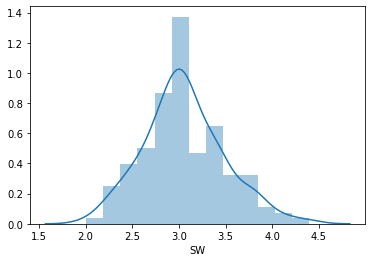

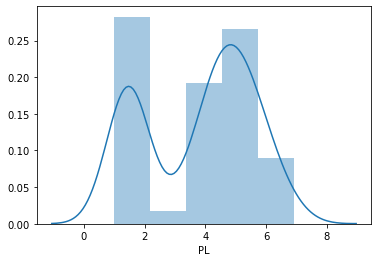

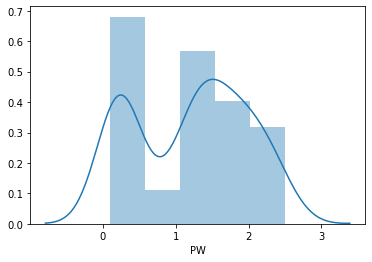

In [7]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    sns.distplot(data[i])

# Handling Missing Values

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Handling Outliers

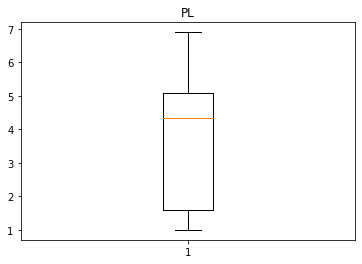

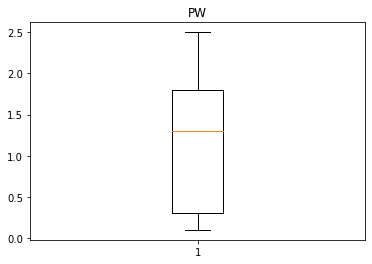

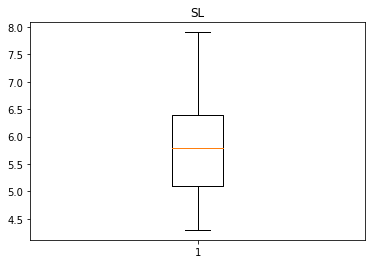

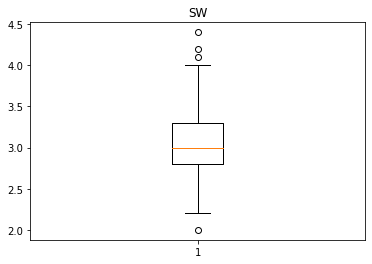

In [9]:
for i in ['PL', 'PW', 'SL', 'SW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [10]:
Q1 = np.percentile(data['SW'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['SW'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['SW'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print(low_lim)
print(up_lim)

2.05
4.05


In [11]:
ind1 = data['SW']<low_lim
ind2 = data['SW']>up_lim
data.drop(data.loc[ind1].index,inplace=True)
data.drop(data.loc[ind2].index,inplace=True)

Text(0.5, 1.0, 'SW')

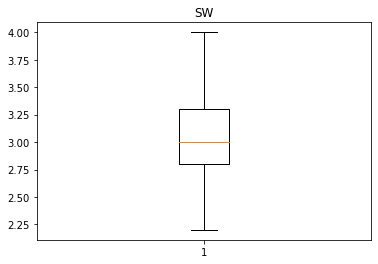

In [12]:
plt.boxplot(data['SW'])
plt.title('SW')

# Encoding Classification Column

In [13]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Classification, dtype: int64

In [14]:
data['Classification']=data['Classification'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
data['Classification']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 146, dtype: int64

# Splitting data

In [15]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
print('\n**********Logistic Regression**********')
print('\nConfusion Matrix\n')
print(confusion)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))


**********Logistic Regression**********

Confusion Matrix

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]

Accuracy is: 0.9333333333333333


# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

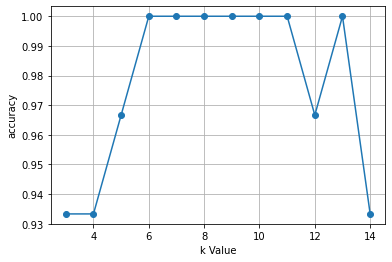

In [19]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [20]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
print('\n**********KNN**********')
print('\nConfusion Matrix\n')
print(confusion)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))


**********KNN**********

Confusion Matrix

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]

Accuracy is: 1.0


# Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
print('\n**********Decision Tree Classifier**********')
print('\nConfusion Matrix\n')
print(confusion)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))


**********Decision Tree Classifier**********

Confusion Matrix

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]

Accuracy is: 0.9333333333333333


# SVM Classifier

In [22]:
from sklearn.svm import SVC
sm = SVC()
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
print('\n**********SVM Linear**********')
print('\nConfusion Matrix\n')
print(confusion)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))


**********SVM Linear**********

Confusion Matrix

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]

Accuracy is: 0.9666666666666667


# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
print('\n**********Random Forest**********')
print('\nConfusion Matrix\n')
print(confusion)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))


**********Random Forest**********

Confusion Matrix

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]

Accuracy is: 0.9333333333333333


# SVM Linear for different Random state value

In [24]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']

In [25]:
metric_s = []
rs= np.arange(30,50)
sm = SVC(kernel='linear')

for i in rs:
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
    sm.fit(X_train, y_train)
    y_pred = sm.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_s.append(acc)

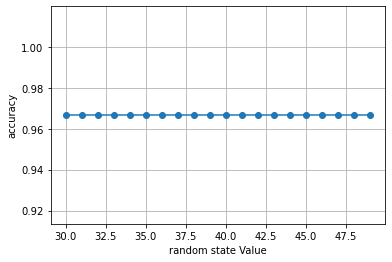

In [26]:
plt.plot(rs,metric_s,'o-')
plt.xlabel('random state Value')
plt.ylabel('accuracy')
plt.grid()

# Checking SVM Linear model

In [27]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [29]:
from sklearn.svm import SVC
sm = SVC(kernel='linear')
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)

In [30]:
confusion=confusion_matrix(y_test,y_pred)
print('\n**********SVM Linear**********')
print('\nConfusion Matrix\n')
print(confusion)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))


**********SVM Linear**********

Confusion Matrix

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]

Accuracy is: 0.9666666666666667


#### Here best model is SVM Linear with accuracy of 96.67%

In [31]:
X.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [32]:
y_out=sm.predict([[5.1,3.5,1.4,0.2]])
y_out

array([0], dtype=int64)

In [33]:
y_out=sm.predict([[7,3.2,4.7,1.4]])
y_out

array([1], dtype=int64)

In [34]:
y_out=sm.predict([[6.3,3.3,6,2.5]])
y_out

array([2], dtype=int64)

In [35]:
SL=6.3
SW=3.3
PL=6
PW=2.5
inp=[SL, SW, PL, PW]
inp=np.reshape(inp,(1,-1))
y_out=sm.predict(inp)
y_out

array([2], dtype=int64)